In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Information and Entropy

- Information theory as a way to found the coding propeprties of Neural system.

- Information quantifies that degree of the surprise


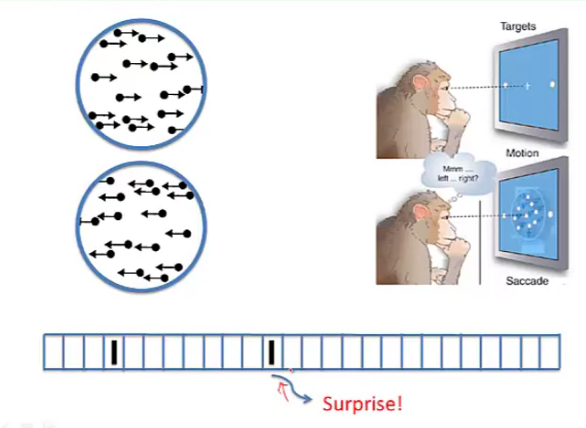

In [2]:
Image(filename= "surprise.png", width=400)

- the probability of fidning a spike in the stimulus is $p$ and not finding is $1-p$, The **information** we get from seeing the spike is $-\log(p)$ and not seeing the spike (or silence) is $-\log(1-p)$

- Entropy is the average information of random variable, it's calculated in log base 2 and the unit are bits.

- it's very similar to yes/no question decision tree.

- as long as we have coherency in the stimulus, the entropy is reduced. the entropy emerges as the pattern (difference) starts to show. the entropy is maximum as the two probabilities are close

- Entropy = $-\sum_{i=1}^2 p_i \log_2 p_i$ where i is the status (firing / not firing)

- the problem is that the stimulus doesn't necessary lead to encoding. how much of the variability of stimulus is acually encoding? the way to do it is to calcualte how much of the entropy of response can be assigned to noise. this is called **stmiulus driven entropy**

- the entropy coming from the stimulus equals to the total entropy minus the noise entropy.

- There is a degree of mutual information between $R$ and $S$ as the noise is small. when the noise reaches high levels, there is no **mutual information** between the $R$ and $S$. If the stimulus and response are independent events with their own probabilities, $p(s)$ & $p(r)$, then $p(r|s) = p(r)$

- Total entropy = $-\sum_{r} p(r) \log_2 p(r)$

- noise entropy = $-\sum_{s} p(s) [-\sum_{r} p(r|s) \log_2 p(r|s) ]$

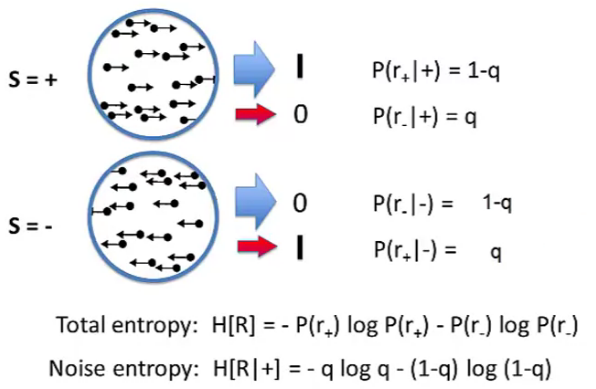

In [3]:
Image(filename= "entropy.png", width=400)

we can use Kullback–Leibler divergence $D_{KL}$ to get the relation between $p(R|S)$ and $p(R)p(S)$  ...

- to get the mutual infromation, take stimulus $S$ and repeat it many times and get $p(R|S)$, calculate the entropy of response due to noise $H(R|S)$ and average it $\sum p(s) p(R|S)$ and also the probability of the response $p(R)$. THis gives us the total entropy.

## Calculating information in spike trains

two methods (by Bill Bialek):

1- information in spike patterns

2- information in single spike

### Spike train:

spike pattern: in the spike, we divide the train into small intervals $\Delta t$

- for each pattern, we got the probability distribution $p(w)$.

for calculating the noise entropy, same stimulus is given evrytime. $p(w|s)$

intuitivly, as along as the word or sequence is large, the entropy is small, so we need a proper length of pattern.

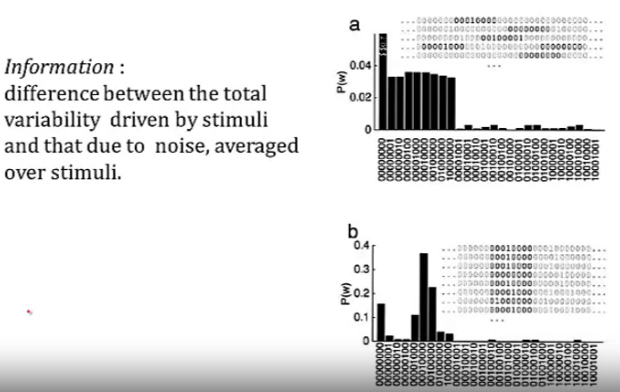

In [4]:
Image(filename= "info.png", width=600)

### information from single spike

same as before, we calculate the entropy for total and entropy with fied stimulus ...

entropy of the response = Total entropy - noise entropy

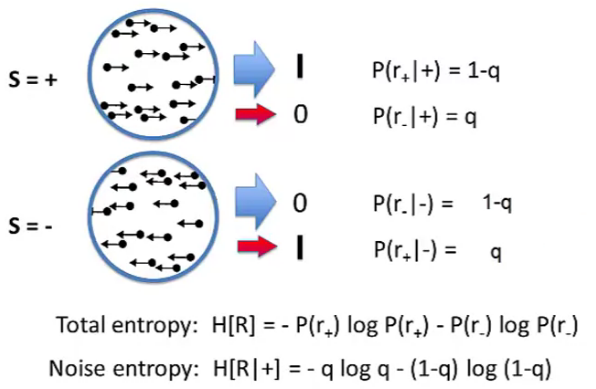

In [5]:
Image(filename= "entropy.png", width=400)

## Coding principles

- Natural stimuli has hugh dynamic range over many order of mangitude

- what makes a good code? is the less entropy

- Information provides a way to measure the amount of surprise. Entropy provides a measure of the average amount of information needed to represent an event drawn from a probability distribution for a random variable.

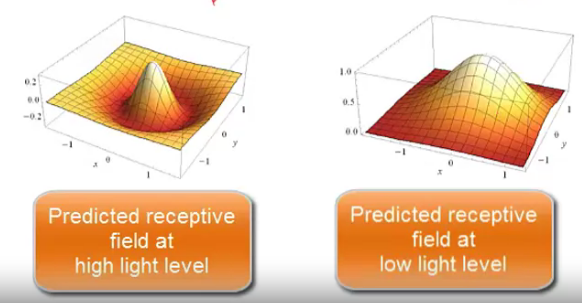

In [6]:
Image(filename= "dynamic_range_features.png", width=400)

In [7]:
#Answers 
# 0.4690
# 0.8476
# The pieces that make the image
# the difference
# the level of transparancy
# the importance of coding
# half wave rectifed cosine
#

In [11]:
import pickle

with open('tuning_3.4.pickle', 'rb') as f:
    data = pickle.load(f)
    
neuron_1 = data['neuron1']
neuron_2 = data['neuron2']
neuron_3 = data['neuron3']
neuron_4 = data['neuron4']
stim = data['stim']

In [29]:
neuron1 = np.mean(neuron_1, axis=0)
neuron2 = np.mean(neuron_2, axis=0)
neuron3 = np.mean(neuron_3, axis=0)
neuron4 = np.mean(neuron_4, axis=0)

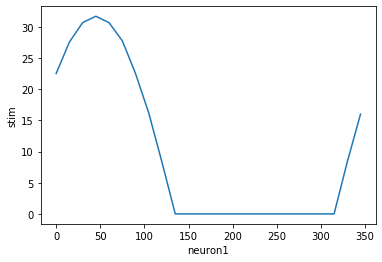

In [36]:
plt.xlabel('neuron1')
plt.ylabel('stim')
plt.plot(stim, neuron1)
plt.show()

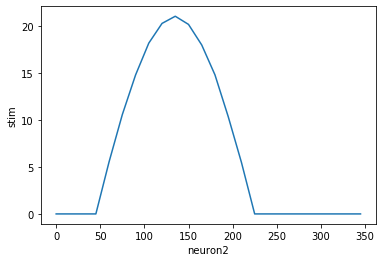

In [37]:
plt.xlabel('neuron2')
plt.ylabel('stim')
plt.plot(stim, neuron2)
plt.show()

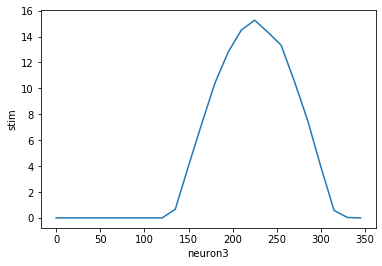

In [39]:
plt.xlabel('neuron3')
plt.ylabel('stim')
plt.plot(stim, neuron3)
plt.show()

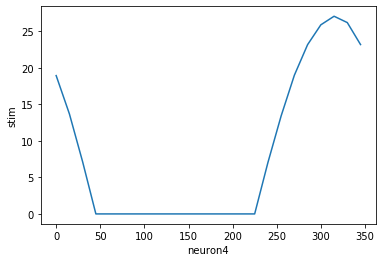

In [40]:
plt.xlabel('neuron4')
plt.ylabel('stim')
plt.plot(stim, neuron4)
plt.show()

fano factor = variance / mean

In [111]:
neurons = [neuron1, neuron2, neuron3, neuron4]
fanos = []
interval = 10
for neuron in neurons:
    var = np.std(neuron)
    mean = np.mean(neuron)
    fano = var/mean
    fanos.append(fano)

In [112]:
fanos

[1.2208407739463398, 1.221605529547557, 1.2014010157377104, 1.2213328049396608]

In [113]:
import pickle

with open('pop_coding_3.4.pickle', 'rb') as f:
    pop_data = pickle.load(f)

In [114]:
pop_data

{'c1': array([0.70710678, 0.70710678]),
 'r1': array([11.9, 12.8, 13.9, 12.1, 11.3, 12.2, 12.9, 12.4, 13.2, 10.7]),
 'r3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'c2': array([ 0.70710678, -0.70710678]),
 'c3': array([-0.70710678, -0.70710678]),
 'r2': array([18.8, 18. , 19. , 19.1, 18.1, 21.5, 20.3, 21.2, 18.6, 20.4]),
 'c4': array([-0.70710678,  0.70710678]),
 'r4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [139]:
c1 = pop_data['c1']
c2 = pop_data['c2']
c3 = pop_data['c3']
c4 = pop_data['c4']
r1 = pop_data['r1']
r2 = pop_data['r2']
r3 = pop_data['r3']
r4 = pop_data['r4']
r1_max_avg = np.mean(r1/np.max(r1)*45)
r2_max_avg = np.mean(r2/np.max(r2)*-45)

$V_{pop}=\sum^{4}_{a=1} (\frac{r}{r_{max}})_a C_a$

Where $r_a$ is activity of cell a and $C_a$ is the preferred input for cell $a$

In [140]:
F = r1_max_avg + r2_max_avg
F

-0.8643132006023109

## References:

https://www.coursera.org/learn/computational-neuroscience

https://machinelearningmastery.com/what-is-information-entropy/

https://neuronaldynamics.epfl.ch/online/Ch7.S2.html

https://en.wikipedia.org/wiki/Population_vector